Exercise:1

Perform Basic text pre-processing using the following approaches:
* Stop word Elimination
* Removal of Special Characters
* Lemmatization
* Stemming

In this lab we will cover the following:
*  Importing Libraries
*  Natural Language Processing libraries
*  Text Preprocessing
  *  Lower casing
  *  Punctuation removal
  *  Identifying and Remove Stop Words
  *  Tokenize Text in Words
  *  NLTK Word Stemming
  *  Lemmatizing Words Using WordNet
  *  Stemming and Lemmatization Difference
  *  Plotting Frequencies of Words
  *  Removing frequent unimportant words


Dataset: imdb

# **Natural Language Processing (NLP)**

NLP is the branch of Artificial Intelligence that allows machines to interpret human language.  
 
However, the same cannot be used directly by the machine, and we need to pre-process the same first.






#**1)Text pre-processing** 

is the process of preparing text data so that machines can use the same to perform tasks like analysis, predictions, etc. There are many different steps in text pre-processing but in this exercise, we will get familiar with stop words, why do we remove them, and the different libraries that can be used to remove them.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.sentiment.util import *


from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint


In [ ]:
#downloading IMDB movie review dataset
nltk.download("movie_reviews")  

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
# importing the dataset
from nltk.corpus import movie_reviews

In [ ]:
type(movie_reviews)

nltk.corpus.reader.plaintext.CategorizedPlaintextCorpusReader

In [ ]:
#Check the number of review files in the dataset
len(movie_reviews.fileids())

2000

In [ ]:
#Visualize the names of the first five files
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [ ]:
#Visualize the names of the last five files
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

In [ ]:
#Loading negative and positive reviews into Separate files
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [ ]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

In [ ]:
#Randomly checking one review
print(movie_reviews.raw(fileids=positive_fileids[20]))

by phil curtolo mel gibson ( braveheart ) gave a gripping performance as the father of a young kidnapped boy in ron howard's ransom . 
gibson plays tom mullen , a wealthy business tycoon whose past actions are coming back to haunt him as a deranged psychopath , played by gary sinise ( forrest gump ) , and his band of low-life thugs kidnap his only son for $2 million . 
tom and his wife , kate , played by rene russo ( tin cup ) were instructed not to inform the police , but they contacted the fbi . 
minutes later , an elite team of agents led by delroy lindo ( broken arrow ) are in tom's house and wiring every phone . 
the plot sounds average , just like most other kidnap movies that you've already seen , and it was nothing more than that . 
that is until about half-way through the movie . 
suddenly , tom goes to the fox 5 news room and makes a live broadcast saying , " this is your ransom . 
but this is as close as you will ever get to it . 
instead , i am offering this money as a rewa

In [ ]:
negative_fileids[2]

'neg/cv002_17424.txt'

In [ ]:
#Converting negative reviews to a data frame
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [ ]:
#Converting positive reviews to a data frame
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [ ]:
#Visualize few sample reviews of positive data frame
positive_features.head(20)

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
5,"on june 30 , 1960 , a self-taught , idealistic...",pos
6,"apparently , director tony kaye had a major ba...",pos
7,one of my colleagues was surprised when i told...,pos
8,"after bloody clashes and independence won , lu...",pos
9,the american action film has been slowly drown...,pos


##**1.1)Lower casing**
Conversion of case to lower case

In [ ]:
# Convert positive reviews to lower case
positive_features.review = positive_features.review.apply(lambda x:x.lower())

In [ ]:
# Convert positive reviews to upper case
negative_features.review = negative_features.review.apply(lambda x:x.lower())

# **1.2)Punctuation**
Similar to stopwords, since our text is already split into sentences removing punctuation can be performed without much information loss and to clean up the text to just words.

In [ ]:
positive_features.review[1]

'every now and then a movie comes along from a suspect studio , with every indication that it will be a stinker , and to everybody\'s surprise ( perhaps even the studio ) the film becomes a critical darling . \nmtv films\' _election , a high school comedy starring matthew broderick and reese witherspoon , is a current example . \ndid anybody know this film existed a week before it opened ? \nthe plot is deceptively simple . \ngeorge washington carver high school is having student elections . \ntracy flick ( reese witherspoon ) is an over-achiever with her hand raised at nearly every question , way , way , high . \nmr . " m " ( matthew broderick ) , sick of the megalomaniac student , encourages paul , a popular-but-slow jock to run . \nand paul\'s nihilistic sister jumps in the race as well , for personal reasons . \nthe dark side of such sleeper success is that , because expectations were so low going in , the fact that this was quality stuff made the reviews even more enthusiastic tha

In [ ]:
positive_features.review[1].split()[0:20]  #upto 20 indexes

['every',
 'now',
 'and',
 'then',
 'a',
 'movie',
 'comes',
 'along',
 'from',
 'a',
 'suspect',
 'studio',
 ',',
 'with',
 'every',
 'indication',
 'that',
 'it',
 'will',
 'be']

In [ ]:
punctuations = list(string.punctuation)
punctuations[1:20] #upto 20 indexes from our punctuation string

['"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>']

In [ ]:
# REmoval of punctuations
positive_features.review = positive_features.review.apply(lambda x: " ".join(x for x in x.split() if x not in punctuations))
negative_features.review = negative_features.review.apply(lambda x: " ".join(x for x in x.split() if x not in punctuations))

In [ ]:
# Visualize data after removing punctuations
positive_features.review[1]

"every now and then a movie comes along from a suspect studio with every indication that it will be a stinker and to everybody's surprise perhaps even the studio the film becomes a critical darling mtv films' _election a high school comedy starring matthew broderick and reese witherspoon is a current example did anybody know this film existed a week before it opened the plot is deceptively simple george washington carver high school is having student elections tracy flick reese witherspoon is an over-achiever with her hand raised at nearly every question way way high mr m matthew broderick sick of the megalomaniac student encourages paul a popular-but-slow jock to run and paul's nihilistic sister jumps in the race as well for personal reasons the dark side of such sleeper success is that because expectations were so low going in the fact that this was quality stuff made the reviews even more enthusiastic than they have any right to be you can't help going in with the baggage of glowing

In [ ]:
#here we can see punctuations were removed
positive_features.review[1].split()[0:20] 

['every',
 'now',
 'and',
 'then',
 'a',
 'movie',
 'comes',
 'along',
 'from',
 'a',
 'suspect',
 'studio',
 'with',
 'every',
 'indication',
 'that',
 'it',
 'will',
 'be',
 'a']

# **1.3)Identifying and Remove Stop Words**

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”).
Removal of stopwords is necessary since they add noise without having any informational value in modeling.

In [ ]:
# Loading stop words from nltk toolkit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# importing all the stop words list of English 
stop = stopwords.words('english') 

In [ ]:
# Visualize the first 20 stop words of english language as per nltk
stop[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
#Total number of stop words of english language as per nltk
print('Total stop words:',len(stop)) 

Total stop words: 179


In [ ]:
#Removing stop words
positive_features.review = positive_features.review.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
negative_features.review = negative_features.review.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
# Visualize a review after stop word removal
positive_features.review[1]  

"every movie comes along suspect studio every indication stinker everybody's surprise perhaps even studio film becomes critical darling mtv films' _election high school comedy starring matthew broderick reese witherspoon current example anybody know film existed week opened plot deceptively simple george washington carver high school student elections tracy flick reese witherspoon over-achiever hand raised nearly every question way way high mr matthew broderick sick megalomaniac student encourages paul popular-but-slow jock run paul's nihilistic sister jumps race well personal reasons dark side sleeper success expectations low going fact quality stuff made reviews even enthusiastic right can't help going baggage glowing reviews contrast negative baggage reviewers likely _election good film live hype makes _election_ disappointing contains significant plot details lifted directly _rushmore_ released months earlier similarities staggering tracy flick _election_ president extraordinary nu

# **1.4)Tokenize Text in Words**

* Tokenizing text is important since text can’t be processed without tokenization. 
* Tokenization process means splitting bigger parts to small parts.
* You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs.
* NLTK comes with sentence tokenizer and word tokenizer.
* Non english text can also be tokenized by specifying the language
  * Sentence Tokenization


In [ ]:
#Use Punkt Sentence Tokenizer of nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Sentence Tokenizing:**

In [ ]:
#sentences are tokenized using "_"
sent_tokenize(positive_features.review[1]) 

["every movie comes along suspect studio , every indication stinker , everybody's surprise ( perhaps even studio ) film becomes critical darling .",
 "mtv films' _election , high school comedy starring matthew broderick reese witherspoon , current example .",
 'anybody know film existed week opened ?',
 'plot deceptively simple .',
 'george washington carver high school student elections .',
 'tracy flick ( reese witherspoon ) over-achiever hand raised nearly every question , way , way , high .',
 'mr . " " ( matthew broderick ) , sick megalomaniac student , encourages paul , popular-but-slow jock run .',
 "paul's nihilistic sister jumps race well , personal reasons .",
 'dark side sleeper success , expectations low going , fact quality stuff made reviews even enthusiastic right .',
 "can't help going baggage glowing reviews , contrast negative baggage reviewers likely .",
 '_election , good film , live hype .',
 'makes _election_ disappointing contains significant plot details lifted 

**Word Tokenizing:**

In [ ]:
positive_features['review_tokenized'] = positive_features.review.apply(lambda x: word_tokenize(x))
negative_features['review_tokenized'] = negative_features.review.apply(lambda x: word_tokenize(x))

In [ ]:
positive_features['review_tokenized'].head()

0    [films, adapted, comic, books, plenty, success...
1    [every, movie, comes, along, suspect, studio, ...
2    [got, mail, works, alot, better, deserves, ord...
3    [jaws, rare, film, grabs, attention, shows, si...
4    [moviemaking, lot, like, general, manager, nfl...
Name: review_tokenized, dtype: object

# **1.5)NLTK Word Stemming**

* Word stemming means removing affixes from words and return the root word. 
  * Ex: The stem of the word working => work.
* Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.
* There are many algorithms for stemming, but the most popular algorithm is **Porter stemming** algorithm.
* NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

In [ ]:
# LOading PorterStemmer
stemmer = PorterStemmer()
#Showing the use of stemmer on the word working
print(stemmer.stem('working'))

work


In [ ]:
# Apply Stemmer on reviews data
positive_features['review_stemmed'] = positive_features.review_tokenized.apply(lambda x: [stemmer.stem(word) for word in x])
negative_features['review_stemmed'] = negative_features.review_tokenized.apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
positive_features.review_stemmed.head()

0    [film, adapt, comic, book, plenti, success, wh...
1    [everi, movi, come, along, suspect, studio, ev...
2    [got, mail, work, alot, better, deserv, order,...
3    [jaw, rare, film, grab, attent, show, singl, i...
4    [moviemak, lot, like, gener, manag, nfl, team,...
Name: review_stemmed, dtype: object

In [ ]:
positive_features.review_stemmed.head()

0    [film, adapt, comic, book, plenti, success, wh...
1    [everi, movi, come, along, suspect, studio, ev...
2    [got, mail, work, alot, better, deserv, order,...
3    [jaw, rare, film, grab, attent, show, singl, i...
4    [moviemak, lot, like, gener, manag, nfl, team,...
Name: review_stemmed, dtype: object

## **1.6)Lemmatizing Words Using WordNet**


**Wordnet:**

* WordNet is a lexical database for the English language.
* It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members.
* WordNet can thus be seen as a combination of dictionary and thesaurus. 
* While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

**Lemmatization:**

* Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices.
* It makes use of the vocabulary and does a morphological analysis to obtain the root word. 
* Therefore, we usually prefer using lemmatization over stemming.
* Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [ ]:
# Downloading lexical database for the English language, wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Downloading package open Multilingual Wordnet (OMW)
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Showing the use of Lemmatizer on the word increases
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('increases'))


increase


Sometimes, if you try to lemmatize a word like the word playing, it will end up with the same word.
This is because the default part of speech is nouns. To get verbs, you should specify the PoS tag as follows:

In [ ]:
print(lemmatizer.lemmatize('playing'))
print(lemmatizer.lemmatize('playing', pos="v"))

playing
play


This is a very good level of text compression, you end up with about 50% to 60% compression.
The result could be a verb, noun, adjective, or adverb

In [ ]:
#Part-of-speech constants: 
# {ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'}

print(lemmatizer.lemmatize('playing', pos="v")) #verb
 
print(lemmatizer.lemmatize('playing', pos="n")) #noun 
 
print(lemmatizer.lemmatize('playing', pos="a")) # adjective
 
print(lemmatizer.lemmatize('playing', pos="r")) # adverb

play
playing
playing
playing


In [ ]:
#Apply lemmatizzer on entire review text
positive_features['review_lemmatized'] = positive_features.review_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
negative_features['review_lemmatized'] = negative_features.review_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Visualize the data before lemmatization
positive_features.review_tokenized.head()


0    [films, adapted, comic, books, plenty, success...
1    [every, movie, comes, along, suspect, studio, ...
2    [got, mail, works, alot, better, deserves, ord...
3    [jaws, rare, film, grabs, attention, shows, si...
4    [moviemaking, lot, like, general, manager, nfl...
Name: review_tokenized, dtype: object

In [ ]:
# Visualize the data after lemmatization
positive_features.review_lemmatized.head()

0    [film, adapted, comic, book, plenty, success, ...
1    [every, movie, come, along, suspect, studio, e...
2    [got, mail, work, alot, better, deserves, orde...
3    [jaw, rare, film, grab, attention, show, singl...
4    [moviemaking, lot, like, general, manager, nfl...
Name: review_lemmatized, dtype: object

# **1.7)Stemming and Lemmatization Difference**

The goal of both stemming and lemmatization is to reduce inflectional forms.

* Stemming
  * Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.
  * For instance, stemming the word ‘Caring‘ would return ‘Car‘. 


* Lemmatization
  
  * Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.
  * For instance, lemmatizing the word ‘Caring‘ would return ‘Care‘.

In [ ]:
print('stones:',stemmer.stem('stones'))
 
print('speaking:',stemmer.stem('speaking'))
 
print('bedroom:',stemmer.stem('bedroom'))
 
print('jokes:',stemmer.stem('jokes'))
 
print('lisa:',stemmer.stem('lisa'))
 
print('purple:',stemmer.stem('purple'))
 
print('caring:',stemmer.stem('caring'))
 
print('----------------------')
 
print('stones:',lemmatizer.lemmatize('stones'))
 
print('speaking:',lemmatizer.lemmatize('speaking', pos = 'v'))
 
print('bedroom:',lemmatizer.lemmatize('bedroom'))
 
print('jokes:',lemmatizer.lemmatize('jokes'))
 
print('lisa:',lemmatizer.lemmatize('lisa'))
 
print('purple:',lemmatizer.lemmatize('purple'))

print('caring:',lemmatizer.lemmatize('caring'))

stones: stone
speaking: speak
bedroom: bedroom
jokes: joke
lisa: lisa
purple: purpl
caring: care
----------------------
stones: stone
speaking: speak
bedroom: bedroom
jokes: joke
lisa: lisa
purple: purple
caring: caring


**Stemming works on words without knowing its context and that’s why stemming has lower accuracy and faster than lemmatization**

**Word lemmatizing returns a real word even if it’s not the same word, it could be a synonym, but at least it’s a real word.**

When accuracy is not as important as speed, stemming might be better.

# **1.8)Plotting Frequencies of Words**

Extract all words in a list:

In [ ]:
# Conversion of the dict to list
positive_review_list = positive_features['review_lemmatized'].tolist()
negative_review_list = negative_features['review_lemmatized'].tolist()

In [ ]:
# Conversion of the entire dict to a single list
positive_review_list = [item for sublist in positive_review_list for item in sublist]
negative_review_list = [item for sublist in negative_review_list for item in sublist]

In [ ]:
# Check the total Number of positive words
print('Number of positive words',len(positive_review_list))

Number of positive words 2268979


In [ ]:
# Check the total Number of negative words
print('Number of negative words',len(negative_review_list))

Number of negative words 1992944


In [ ]:
# Check the total Number of words
all_words = (positive_review_list + negative_review_list)
print('Number of total words in corpus',len(all_words))

Number of total words in corpus 4261923


**Initialize word frequency counter:**

In [ ]:
word_counter = Counter(all_words)

**Pick top 20 most common words:**

In [ ]:
most_common_words = word_counter.most_common()[:20]
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'freq']
most_common_words

,word,freq
0,'s,14031
1,film,10963
2,movie,6861
3,one,5758
4,character,3854
5,like,3645
6,time,2847
7,get,2787
8,scene,2642
9,make,2585


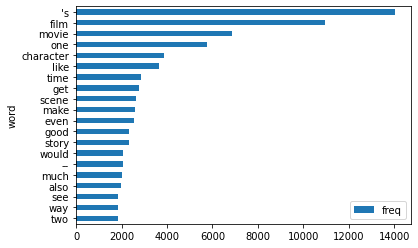

In [ ]:
most_common_words.sort_values(by='freq',ascending=True).plot(x='word', kind='barh')

**Sort the word counts and plot their values on Logarithmic axes to check the shape of the distribution:**

This visualization is particularly useful if comparing 2 or more datasets
A flatter distribution indicates a large vocabulary while a peaked distribution a restricted vocabulary often due to a focused topic or specialized language.

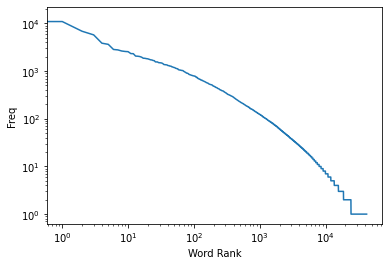

In [ ]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

**Histogram of sorted_word_counts:**

Displays how many words have a count in a specific range.
The distribution is highly peaked at low counts, i.e. most of the words appear which a low count, so we better display it on semilogarithmic axes to inspect the tail of the distribution.

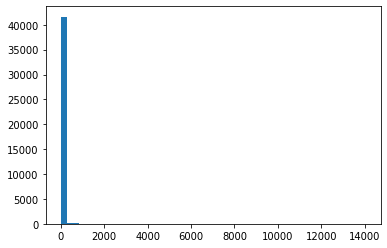

In [ ]:
plt.hist(sorted_word_counts, bins=50);

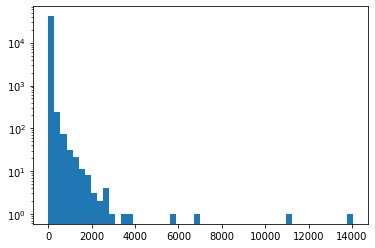

In [ ]:
plt.hist(sorted_word_counts, bins=50, log=True);

**Word length comparison of positive and negative reviews:**

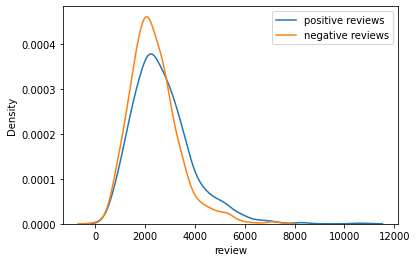

In [ ]:
sns.distplot(positive_features['review'].apply(lambda y: len(y)), label='positive reviews',hist=False)
sns.distplot(negative_features['review'].apply(lambda y: len(y)), label='negative reviews',hist=False)
plt.legend()
plt.show()

# **1.9)Removing frequent unimportant words**

In [ ]:
most_common_words.word.tolist()[:5]

["'s", 'film', 'movie', 'one', 'character']

In [ ]:
remove = most_common_words.word.tolist()[:5]
remove

["'s", 'film', 'movie', 'one', 'character']

In [ ]:
negative_features['review_lemmatized'] = negative_features['review_lemmatized'].apply(lambda x: [y for y in x if y not in remove])
positive_features['review_lemmatized'] = positive_features['review_lemmatized'].apply(lambda x: [y for y in x if y not in remove])

In [ ]:
positive_features.review_lemmatized.head()

0    [adapted, comic, book, plenty, success, whethe...
1    [every, come, along, suspect, studio, every, i...
2    [got, mail, work, alot, better, deserves, orde...
3    [jaw, rare, grab, attention, show, single, ima...
4    [moviemaking, lot, like, general, manager, nfl...
Name: review_lemmatized, dtype: object

In [ ]:
negative_features.review_lemmatized.head()

0    [plot, two, teen, couple, go, church, party, d...
1    [happy, bastard, quick, review, damn, y2k, bug...
2    [like, make, jaded, viewer, thankful, inventio...
3    [quest, camelot, warner, bros, first, feature-...
4    [synopsis, mentally, unstable, man, undergoing...
Name: review_lemmatized, dtype: object